## Data Exploration and Cleaning w/ Jupyter Notebook

### Packages versions

In [1]:
import sys
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

print('The Python version is: {}\n'.format(sys.version))
print('The Pandas version is: {}\n'.format(pd.__version__))
print('The Matplotlib version is: {}\n'.format(mpl.__version__))

The Python version is: 3.8.5 (default, Jul 28 2020, 12:59:40) 
[GCC 9.3.0]

The Pandas version is: 1.1.0

The Matplotlib version is: 3.3.3



### Loading data into Jupyter w/ Pandas

In [2]:
df = pd.read_excel('data/default_of_credit_card_clients__courseware_version_1_21_19.xls')

Number of rows and columns (rows, columns):

In [3]:
df.shape 

(30000, 25)

### Getting familiar with the data

Examining the column names:

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Formating the column names to lowercase:

In [5]:
df.columns = [column.lower() for column in df.columns]
df.columns = [column.replace(' ', '_') for column in df.columns]
df.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_payment_next_month'],
      dtype='object')

#### The metadata of this dataset is as follows:

**education**:

Education (1 = graduate school; 2 = university; 3 = high scholl; 4 = others)

**marriage**:

Marital status (1 = married; 2 = single; 3 = others)

**age**:

Age (in years)

**pay_1 to pay_6**:

A record of past payments (pay_1 = repayment status September; ...; pay_6 = repayment status April). The payment value means different status (-1 = pay duly; 1 = payment delay for one month; ...; 9 = payment delay for nine months and above).

**bill_amt1 to bill_amt6**:

Bill statement amount (NT dollar)

**pay_amt1 to pay_amt6**:

Represents the amount of previous payments (pay_amt1 = amount paid in September; ...; pay_amt6 = amount paid in April)

**default payment next month**:

Whether or not a customer defaulted the next month payment

Observing the first few records:

In [6]:
df.head()

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Certify that the ids are unique:

In [7]:
df.id.nunique()

29687

Verifying the the duplicate ids:

In [8]:
id_counts = df['id'].value_counts()
id_counts.head()

ddcc7278-7017    2
f5e3478e-cf68    2
3884eeca-7714    2
adeed333-dbfd    2
ef889a72-06f5    2
Name: id, dtype: int64

Veirifying the number of duplicates:

In [9]:
id_counts.value_counts()

1    29374
2      313
Name: id, dtype: int64

### Boolean Masks

In [10]:
dup_mask = id_counts == 2
dup_mask[0:5]

ddcc7278-7017    True
f5e3478e-cf68    True
3884eeca-7714    True
adeed333-dbfd    True
ef889a72-06f5    True
Name: id, dtype: bool

Extracting the duplication ids:

In [11]:
id_counts.index[0:5]

Index(['ddcc7278-7017', 'f5e3478e-cf68', '3884eeca-7714', 'adeed333-dbfd',
       'ef889a72-06f5'],
      dtype='object')

In [12]:
dup_ids = id_counts.index[dup_mask]
dup_ids = list(dup_ids)
len(dup_ids)

313

In [13]:
dup_ids[0:5]

['ddcc7278-7017',
 'f5e3478e-cf68',
 '3884eeca-7714',
 'adeed333-dbfd',
 'ef889a72-06f5']

Displaying df records that have some of these ids:

In [14]:
df.loc[df.id.isin(dup_ids[0:3]), :].head(10)

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
3151,f5e3478e-cf68,160000,1,3,1,46,2,2,0,0,...,73322,57835,41842,0,6322,2275,2343,3069,77005,0
3251,f5e3478e-cf68,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25253,3884eeca-7714,50000,2,2,2,26,Not available,0,0,0,...,50641,40672,39960,2700,2000,2700,1700,1600,1800,0
25353,3884eeca-7714,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28184,ddcc7278-7017,220000,2,2,1,33,0,0,0,0,...,175030,174122,175472,6500,6300,7700,6300,6300,6150,0
28284,ddcc7278-7017,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Selecting df records with all zeroes:

In [15]:
df_zeroes = df == 0
feature_zeroes_mask = df_zeroes.iloc[:, 1:].all(axis=1)
sum(feature_zeroes_mask)

315

Droping all zeroes df records:

In [16]:
df_clean = df.loc[~feature_zeroes_mask, :].copy()
df_clean.shape

(29685, 25)

Checking the uniqueness of the ids:

In [17]:
df_clean.id.nunique() == df_clean.shape[0]

True

### Column data types

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          29685 non-null  object
 1   limit_bal                   29685 non-null  int64 
 2   sex                         29685 non-null  int64 
 3   education                   29685 non-null  int64 
 4   marriage                    29685 non-null  int64 
 5   age                         29685 non-null  int64 
 6   pay_1                       29685 non-null  object
 7   pay_2                       29685 non-null  int64 
 8   pay_3                       29685 non-null  int64 
 9   pay_4                       29685 non-null  int64 
 10  pay_5                       29685 non-null  int64 
 11  pay_6                       29685 non-null  int64 
 12  bill_amt1                   29685 non-null  int64 
 13  bill_amt2                   29685 non-null  in

Checking pay_1 column in detail:

In [19]:
df_clean.pay_1.head()

0     2
1    -1
2     0
3     0
4    -1
Name: pay_1, dtype: object

In [20]:
df_clean.pay_1.value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: pay_1, dtype: int64

In [21]:
valid_pay_1_mask = df_clean.pay_1 != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: pay_1, dtype: bool

In [22]:
sum(valid_pay_1_mask)

26664

Dropping df records that don't have 'pay_1' information:

In [23]:
df_clean = df_clean.loc[valid_pay_1_mask, :].copy()
df_clean.shape

(26664, 25)

In [24]:
df_clean.pay_1.value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: pay_1, dtype: int64

New values found in **pay_1** column: 

The value **-2** account started that month with a zero balance, and never used any credit card.

The value **0** means that at least the mimimum payment was made, but the entire balance wasn't paid.

In [25]:
df_clean.pay_1 = df_clean.pay_1.astype('int64')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          26664 non-null  object
 1   limit_bal                   26664 non-null  int64 
 2   sex                         26664 non-null  int64 
 3   education                   26664 non-null  int64 
 4   marriage                    26664 non-null  int64 
 5   age                         26664 non-null  int64 
 6   pay_1                       26664 non-null  int64 
 7   pay_2                       26664 non-null  int64 
 8   pay_3                       26664 non-null  int64 
 9   pay_4                       26664 non-null  int64 
 10  pay_5                       26664 non-null  int64 
 11  pay_6                       26664 non-null  int64 
 12  bill_amt1                   26664 non-null  int64 
 13  bill_amt2                   26664 non-null  in

## Data Quality Assurance and Exploration

Let's start looking at the 'limit_bal' and 'age' distributions using histograms:

array([[<AxesSubplot:title={'center':'limit_bal'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

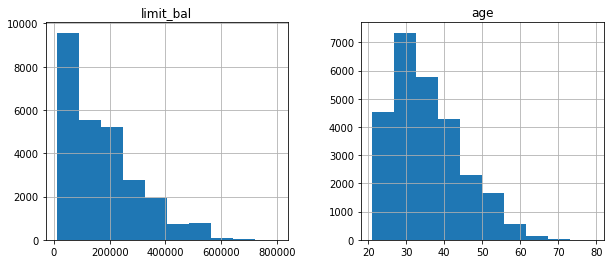

In [26]:
df_clean[['limit_bal', 'age']].hist(figsize=(10,4))

In [27]:
df_clean[['limit_bal', 'age']].describe()

,limit_bal,age
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


**limit_bal**, the credit limit, seems ok. It has a minimum of 10,000 (NT dollar - Taiwan currency). Being above zero makes sense when analyzing minimum limits.

**age** feature also looks reasonably ok, with mimium age of 21 and the maximum age of 79 years old.

Let's look ate the 'education' distribution:

In [28]:
df_clean.education.value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: education, dtype: int64

New values found in **education** column: 

The unknown values will be included in the 'others' category (value of **4**)

In [29]:
df_clean.education.replace(to_replace=[0, 6, 5], value=4, inplace=True)
df_clean.education.value_counts()

2    12458
1     9412
3     4380
4      414
Name: education, dtype: int64

Let's look ate the 'marriage' distribution:

In [30]:
df_clean.marriage.value_counts()

2    14158
1    12172
3      286
0       48
Name: marriage, dtype: int64

New values found in **marriage** column: 

The unknown values will be included in the 'others' category (value of **3**)

In [31]:
df_clean.marriage.replace(to_replace=0, value=3, inplace=True)
df_clean.marriage.value_counts()

2    14158
1    12172
3      334
Name: marriage, dtype: int64

### Exploring some relationships

Let's look at the 'education' distribution:

Text(0.5, 0, 'Education level: ordinal encoding')

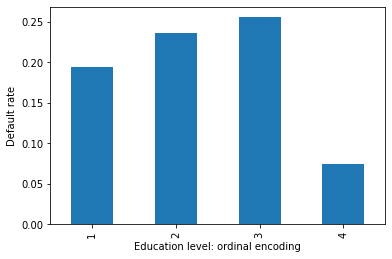

In [32]:
df_clean.groupby('education').agg({'default_payment_next_month': 'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

Let's 'reverse engineer' the education categorical values to one hot enconding (OHE):

In [33]:
cat_map = {
    1: 'graduate_school',
    2: 'university',
    3: 'high_school',
    4: 'others'
}

df_clean['education_cat'] = 'none'
df_clean['education_cat'] = df_clean.education.map(cat_map)
df_clean[['education', 'education_cat']].head(10)

,education,education_cat
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate_school
6,1,graduate_school
7,2,university
8,3,high_school
9,3,high_school


In [34]:
edu_ohe = pd.get_dummies(df_clean.education_cat)
edu_ohe.head(10)

,graduate_school,high_school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [35]:
df_with_ohe = pd.concat([df_clean, edu_ohe], axis=1)
df_with_ohe[['education_cat', 'graduate_school', 'high_school', 'university', 'others']].head(10)

,education_cat,graduate_school,high_school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate_school,1,0,0,0
6,graduate_school,1,0,0,0
7,university,0,0,1,0
8,high_school,0,1,0,0
9,high_school,0,1,0,0


Saving the resultant dataframe for posteri